## Logistic Regression Implementation

### Multiclass Classification

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

## create the dataset
X, y=make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=42)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logistic=LogisticRegression()
OneVsRestClassifier(logistic)
logistic.fit(X_train, y_train)
y_pred=logistic.predict(X_test)

In [10]:
y_pred

array([2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2,
       1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1])

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score=accuracy_score(y_test, y_pred)
print(score)

cm=confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))

0.7033333333333334
[[76 20  7]
 [25 48 23]
 [ 2 12 87]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       103
           1       0.60      0.50      0.55        96
           2       0.74      0.86      0.80       101

    accuracy                           0.70       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.70      0.70      0.70       300



## Logistic Regression for Imbalanced Dataset

In [12]:
from collections import Counter

In [13]:
X, y=make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10)

In [15]:
Counter(y)

Counter({0: 9846, 1: 154})

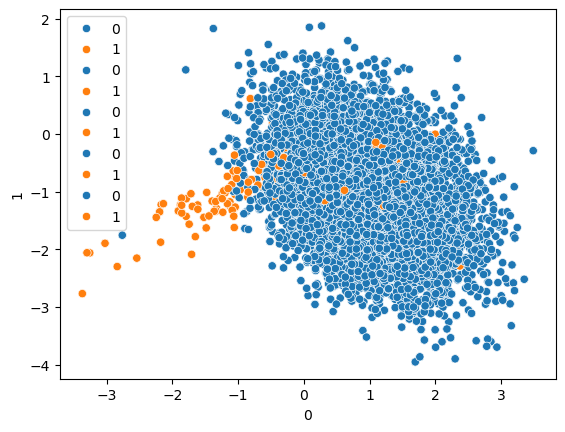

In [23]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
## Hyperparameter Tuning

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

penalty=['l2']
c_values=[100,10, 1.0, 0.1, 0.01]
solver=['lbfgs', 'sag']
class_weight=[{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [26]:
params=dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

In [27]:
params

{'penalty': ['l2'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['lbfgs', 'sag'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

cv=StratifiedKFold()
grid=GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)

In [30]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l2'], 'solver': ['lbfgs', 'sag']},
             scoring='accuracy')

In [31]:
grid.best_params_

{'C': 100, 'class_weight': {0: 50, 1: 100}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [32]:
y_pred=grid.predict(X_test)

In [33]:
score=accuracy_score(y_test, y_pred)
print(score)

cm=confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))

0.9896
[[2465    0]
 [  26    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500

